**Built on Google colab. Best viewed in the dark theme**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import glob
from pandas import DataFrame as df
import numpy as np
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import datetime
from tqdm import tqdm
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [0]:
start=datetime.datetime.now()

In [4]:
items=glob.glob('/gdrive/My Drive/Capstone project images/processed/Grape*/*.JPG',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/4f2e0b9d-ad36-4b62-a475-66f13ce3320b___FAM_B.Rot 0492.JPG
1,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/5982e6f4-421b-41ff-a557-a5f91848695b___FAM_B.Rot 3301.JPG
2,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/4fa94bfb-d2d9-448e-b3f5-498ed75e467b___FAM_B.Rot 0507.JPG
3,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/4a73015b-dbd0-417f-98b3-2016561c9bae___FAM_B.Rot 3577.JPG
4,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/597e8cf7-f504-4eb8-ba2d-b6713bcdf9b8___FAM_B.Rot 3423.JPG


In [5]:
data.groupby(['Disease']).nunique()

,Disease,Image Path
Disease,,
Black_rot,1,1180
Esca_(Black_Measles),1,1383
Leaf_blight_(Isariopsis_Leaf_Spot),1,1076
healthy,1,423


In [0]:
X=data.drop(['Disease'],axis=1)
y=data['Disease']

In [0]:
from pandas import get_dummies

In [8]:
y_dumm=get_dummies(y)
y_dumm.head()

,Black_rot,Esca_(Black_Measles),Leaf_blight_(Isariopsis_Leaf_Spot),healthy
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dumm, test_size=0.2, random_state=42, stratify=y_dumm)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [11]:
img_train=[]
for image in tqdm(X_train['Image Path']):
    img_train.append(cv2.imread(image,1))

100%|██████████| 2436/2436 [05:56<00:00,  6.84it/s]


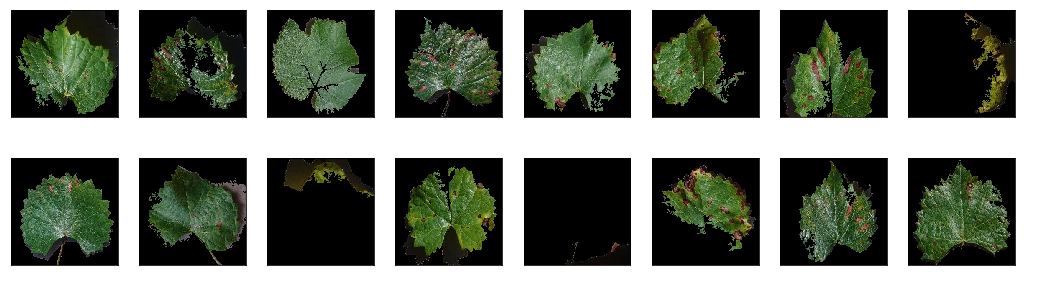

In [12]:
plt.figure(figsize=(18,5))
i=0
for img in img_train[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_train.iloc[i].idxmax(axis=1),color='w')
  i+=1
plt.show()

In [13]:
img_val=[]
for image in tqdm(X_val['Image Path']):
  img_val.append(cv2.imread(image,1))

100%|██████████| 813/813 [00:50<00:00, 16.14it/s]


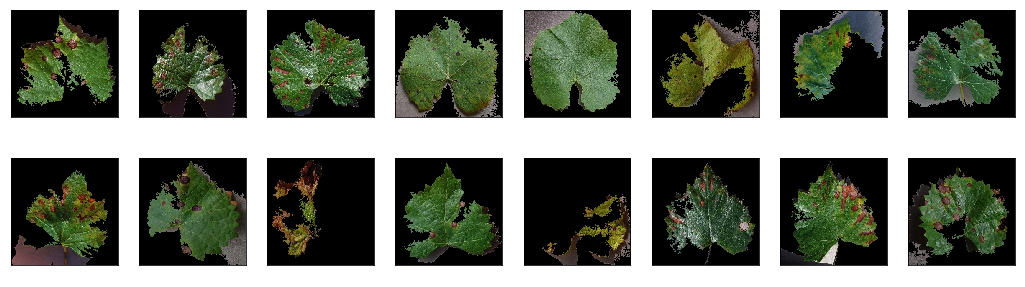

In [14]:
plt.figure(figsize=(18,5))
i=0
for img in img_val[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_val.iloc[i].idxmax(axis=1),color='w')
  i+=1
plt.show()

In [15]:
img_test=[]
for image in tqdm(X_test['Image Path']):
    img_test.append(cv2.imread(image,1))

100%|██████████| 813/813 [00:21<00:00, 38.62it/s]


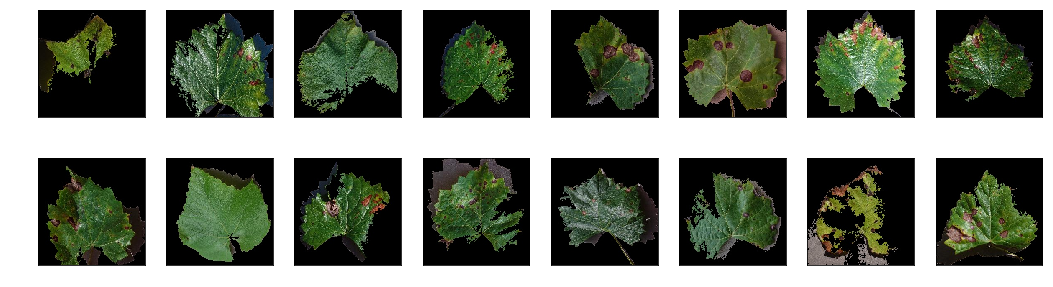

In [16]:
plt.figure(figsize=(18,5))
i=0
for img in img_test[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_test.iloc[i].idxmax(axis=1),color='w')
  i+=1
plt.show()

In [0]:
img_train=np.array(img_train)
img_val=np.array(img_val)
img_test=np.array(img_test)

In [18]:
train=img_train
train.shape

(2436, 256, 256, 3)

In [19]:
val=img_val
val.shape

(813, 256, 256, 3)

In [20]:
test=img_test
test.shape

(813, 256, 256, 3)

In [0]:
import pickle

In [0]:
#cnn1 = pickle.load(open('/gdrive/My Drive/Capstone project images/CNN_segmented_baseline.sav', 'rb'))

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation,Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [24]:
cnn1 = Sequential()

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Conv2D(4,kernel_size=(26, 26)))#,activation='relu'))

cnn1.add(Flatten())

cnn1.add(Activation('softmax'))

cnn1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 32)      36896     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
conv

In [0]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:
y_val_dumm=get_dummies(y_val)

In [28]:
history=cnn1.fit(train,np.array(y_train),epochs=20,callbacks=callbacks,verbose=True,validation_data=(val, y_val_dumm))

Instructions for updating:
Use tf.cast instead.
Train on 2436 samples, validate on 813 samples
Epoch 1/20
2436/2436 [==============================] - 52s 21ms/step - loss: 1.4192 - acc: 0.4335 - val_loss: 1.0283 - val_acc: 0.5437
Epoch 2/20
2436/2436 [==============================] - 38s 16ms/step - loss: 0.9258 - acc: 0.5907 - val_loss: 0.9656 - val_acc: 0.6162
Epoch 3/20
2436/2436 [==============================] - 39s 16ms/step - loss: 0.6266 - acc: 0.7348 - val_loss: 0.5863 - val_acc: 0.7392
Epoch 4/20
2436/2436 [==============================] - 38s 16ms/step - loss: 0.3821 - acc: 0.8530 - val_loss: 0.5375 - val_acc: 0.7811
Epoch 5/20
2436/2436 [==============================] - 38s 16ms/step - loss: 0.2126 - acc: 0.9204 - val_loss: 0.6607 - val_acc: 0.7109
Epoch 6/20
2436/2436 [==============================] - 38s 16ms/step - loss: 0.1599 - acc: 0.9392 - val_loss: 0.6788 - val_acc: 0.7737


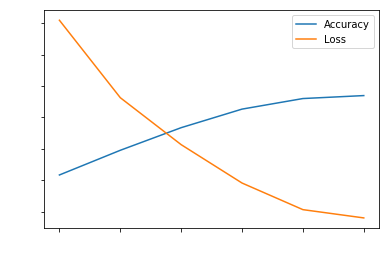

In [29]:
import matplotlib.pyplot as plt
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color('w')
for ticklabel in plt.gca().get_yticklabels():
    ticklabel.set_color('w')
plt.xlabel('Epoch',color='w')
plt.ylabel("Magnitude",color='w')
plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.show()

In [0]:
preds=cnn1.predict(val)

In [0]:
label=['Black_rot','Esca_(Black_Measles)','Leaf_blight_(Isariopsis_Leaf_Spot)','healthy']

In [0]:
import pandas as pd
preds=pd.DataFrame(columns=label,data=preds)

In [33]:
preds.iloc[0].idxmax(axis=1)

'Black_rot'

In [34]:
preds.sum()

Black_rot                             260.695221
Esca_(Black_Measles)                  267.121490
Leaf_blight_(Isariopsis_Leaf_Spot)    200.472473
healthy                               84.710625 
dtype: float32

In [0]:
#pickle.dump(cnn1, open('/gdrive/My Drive/Capstone project images/CNN_segmented_earlystopped.sav', 'wb'))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

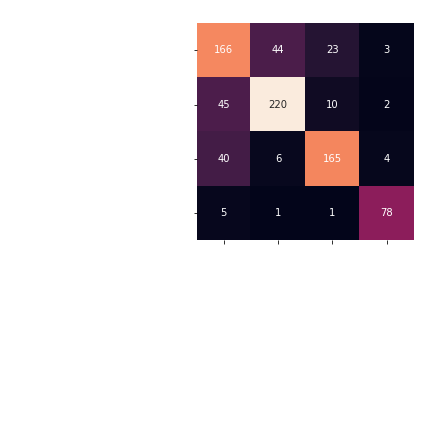

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_val.idxmax(axis=1),preds.idxmax(axis=1)),annot=True,square=True,fmt='g',xticklabels=label,yticklabels=label,cbar=None)
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color('w')
for ticklabel in plt.gca().get_yticklabels():
    ticklabel.set_color('w')
plt.title('Confusion matrix',color='w')
plt.xlabel('Predicted',color='w')
plt.ylabel('True',color='w')
plt.show()

In [38]:
print(classification_report(y_val.idxmax(axis=1),preds.idxmax(axis=1)))

                                    precision    recall  f1-score   support

                         Black_rot       0.65      0.70      0.67       236
              Esca_(Black_Measles)       0.81      0.79      0.80       277
Leaf_blight_(Isariopsis_Leaf_Spot)       0.83      0.77      0.80       215
                           healthy       0.90      0.92      0.91        85

                         micro avg       0.77      0.77      0.77       813
                         macro avg       0.80      0.80      0.80       813
                      weighted avg       0.78      0.77      0.78       813



In [39]:
print(datetime.datetime.now()-start)

0:11:23.134553
